# 1) Get Data

In [1]:
!pip install xgboost
!pip install tabulate
!pip install imblearn
# # jupyter contrib nbextension install --user
# !jupyter nbextension enable toc2/main
# !jupyter labextension install @jupyterlab/toc

You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
# %matplotlib inline
from datetime import datetime
from imblearn.over_sampling import SMOTE, ADASYN
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
from scipy.stats import randint as sp_randint
from sklearn import datasets
from sklearn import linear_model, decomposition, datasets
from sklearn import metrics
from sklearn import preprocessing
from sklearn import svm
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.externals import joblib
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, average_precision_score
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import mean_squared_error, cohen_kappa_score, make_scorer
from sklearn.metrics import precision_recall_curve, SCORERS
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from tabulate import tabulate
from xgboost import XGBClassifier
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import sklearn
import time
import xgboost
matplotlib.style.use('ggplot')
pd.options.mode.chained_assignment = None
plt.rcParams['font.size'] = 24
scaler = preprocessing.StandardScaler()
sns.set(font_scale = 2)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 40)

In [3]:
# df = pd.read_csv("./dataframe.csv")
df = pd.read_pickle("dataframe.pkl")
df.head() # shape = (278220, 35)
# df.info() #(total 36 columns):

,Year,Month,Day,hour,pressure,humidity,temperature,wind_direction,wind_speed,description,Origin,Flights,Dest,DepTime,DepDelay,DepDelayMinutes,DepDel15,CRSDepTime,Distance,DepartureDelayGroups,TaxiOut,TaxiIn,ArrTime,ArrDelay,Cancelled,Diverted,AirTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,CancellationCode,FlightNum,SchedDepartTime
0,2015.0,1.0,1.0,5,1043.0,80.0,273.207333,317.0,1.0,few clouds,ATL,1.0,IAD,556.0,16.0,16.0,1.0,540,534.0,1.0,9.0,15.0,739.0,14.0,0.0,0.0,79.0,534.0,0.0,0.0,0.0,0.0,0.0,0,EV3268,540.0
1,2015.0,1.0,1.0,6,1043.0,80.0,272.990000,329.0,1.0,sky is clear,ATL,1.0,MIA,656.0,-4.0,0.0,0.0,700,594.0,-1.0,15.0,9.0,842.0,-10.0,0.0,0.0,82.0,594.0,0.0,0.0,0.0,0.0,0.0,0,AA17,660.0
2,2015.0,1.0,1.0,6,1043.0,80.0,272.990000,329.0,1.0,sky is clear,ATL,1.0,LGA,644.0,-1.0,0.0,0.0,645,762.0,-1.0,31.0,9.0,901.0,8.0,0.0,0.0,97.0,762.0,0.0,0.0,0.0,0.0,0.0,0,DL886,645.0
3,2015.0,1.0,1.0,6,1043.0,80.0,272.990000,329.0,1.0,sky is clear,ATL,1.0,MCO,654.0,-1.0,0.0,0.0,655,404.0,-1.0,14.0,8.0,815.0,-7.0,0.0,0.0,59.0,404.0,0.0,0.0,0.0,0.0,0.0,0,DL1818,655.0
4,2015.0,1.0,1.0,6,1043.0,80.0,272.990000,329.0,1.0,sky is clear,ATL,1.0,CLT,658.0,-2.0,0.0,0.0,700,226.0,-1.0,15.0,10.0,801.0,-11.0,0.0,0.0,38.0,226.0,0.0,0.0,0.0,0.0,0.0,0,US461,660.0


In [4]:
df = df.loc[:,~df.columns.duplicated()]
df=df[['DepDelay','hour', 'pressure', 'humidity', 'temperature', 'wind_speed', 'description', 'Origin', 'Dest', 'DepTime', 'Distance', 'ArrTime','AirTime','CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay','LateAircraftDelay', 'CancellationCode']]
# df['DATE'] = pd.to_datetime(df[['Year','Month', 'Day']])
# df=df[['DepDelay','hour', 'pressure', 'humidity', 'temperature', 'wind_speed', 'description', 'Origin', 'Dest', 'DepTime', 'Distance', 'ArrTime','AirTime']]
# df=df[df["Origin"]=="ATL"]

In [19]:
df.info() #total 19 columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278220 entries, 0 to 50722
Data columns (total 16 columns):
DepDelay             278220 non-null float64
hour                 278220 non-null int64
pressure             278220 non-null float64
humidity             278220 non-null float64
temperature          278220 non-null float64
wind_speed           278220 non-null float64
description          278220 non-null object
Origin               278220 non-null object
Dest                 278220 non-null object
Distance             278220 non-null float64
CarrierDelay         278220 non-null float64
WeatherDelay         278220 non-null float64
NASDelay             278220 non-null float64
SecurityDelay        278220 non-null float64
LateAircraftDelay    278220 non-null float64
CancellationCode     278220 non-null int64
dtypes: float64(11), int64(2), object(3)
memory usage: 46.1+ MB


In [50]:
# #Create the plot in seaborn
# # plt.figure(figsize=(8, 2))
# g = sns.violinplot(x="Dest", y="DepDelay", data=df[:200],palette="coolwarm")
# g.set_ylabel('Delay')
# g.set_xlabel('')
# label = g.set_xticklabels(g.get_xticklabels(), rotation=90)
# fig = g.get_figure()
# fig.savefig("delay_violin_plot.png", bbox_inches='tight')

# Remove Collinear Features

In [6]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
#     y = df['DepDelay']
    # Dont want to remove correlations between Energy Star Score
    y = df['DepDelay']
    x = df.drop(columns = ['DepDelay'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = df.drop(columns = drops)
#     x = df.drop(columns = ['hour', 'pressure', 'humidity', 'temperature', 'wind_speed',
#        'description', 'Origin', 'Dest', 'DepTime', 'Distance', 'ArrTime',
#        'AirTime'])
    
    # Add the score back in to the data
    x['DepDelay'] = y
               
    return x

df = remove_collinear_features(df, 0.6);
y = df['DepDelay']
X = df.drop(columns = ['DepDelay'])


In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278220 entries, 0 to 50722
Data columns (total 15 columns):
hour                 278220 non-null int64
pressure             278220 non-null float64
humidity             278220 non-null float64
temperature          278220 non-null float64
wind_speed           278220 non-null float64
description          278220 non-null object
Origin               278220 non-null object
Dest                 278220 non-null object
Distance             278220 non-null float64
CarrierDelay         278220 non-null float64
WeatherDelay         278220 non-null float64
NASDelay             278220 non-null float64
SecurityDelay        278220 non-null float64
LateAircraftDelay    278220 non-null float64
CancellationCode     278220 non-null int64
dtypes: float64(10), int64(2), object(3)
memory usage: 34.0+ MB


# Analyze Skewness of data

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


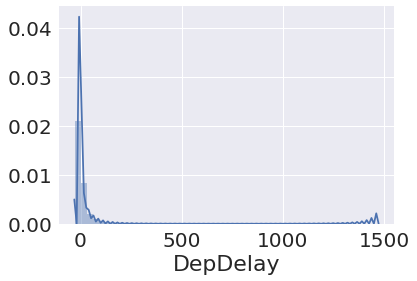

Skewness: 7.769452
Kurtosis: 123.662668


In [8]:
#histogram to figure out skewness
sns.distplot(y)
plt.show()
# delays are mostly located on the left side of the graph, with a long tail to the right 
print("Skewness: %f" % y.skew())
print("Kurtosis: %f" % y.kurt())

# Taking log of flight delays and transform to account for negative values

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


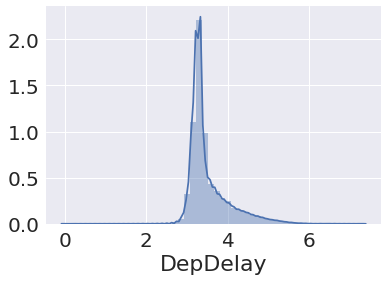

Skewness: 1.885669
Kurtosis: 4.051972


In [10]:
#taking log of flight delays and making the lowest value equal to 1 since there are negative numbers 
z = np.log(y + 1 - min(df['DepDelay']))# 
z.describe()
# z.tail()
sns.distplot(z)
plt.show()
#skew and Kurtosis are much better to modle on now 
print("Skewness: %f" % z.skew())
print("Kurtosis: %f" % z.kurt())

In [25]:
# # #scatterplot
# sns.set()
# cols = ['DepDelay', 'CarrierDelay', 'LateAircraftDelay', 'NASDelay', 'WeatherDelay']
# sns.pairplot(df[cols], size = 2.5)
# plt.show()

In [11]:
features123=X
categorical_subset = features123[['Origin','Dest','description', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'CancellationCode']]
numeric_subset=features123[['hour', 'pressure', 'humidity', 'temperature', 'wind_speed', 'Distance']]
numeric_subset_columns=['hour', 'pressure', 'humidity', 'temperature', 'wind_speed', 'Distance']
# One hot encode

categorical_subset = pd.get_dummies(categorical_subset)
#normalize categorical 
numeric_subset = numeric_subset[numeric_subset_columns].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
# numeric_subset

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features1234 = pd.concat([numeric_subset, categorical_subset], axis = 1)

print(features1234.info())
print(features1234.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278220 entries, 0 to 50722
Columns: 290 entries, hour to description_very heavy rain
dtypes: float64(11), int64(1), uint8(278)
memory usage: 101.4 MB
None
                hour       pressure       humidity    temperature  \
count  278220.000000  278220.000000  278220.000000  278220.000000   
mean        0.605044       0.682790       0.699510       0.509982   
std         0.205597       0.102464       0.230999       0.163319   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.434783       0.611570       0.526882       0.405872   
50%         0.608696       0.677686       0.720430       0.507827   
75%         0.782609       0.760331       0.913978       0.618553   
max         1.000000       1.000000       1.000000       1.000000   

          wind_speed       Distance  CarrierDelay   WeatherDelay  \
count  278220.000000  278220.000000  278220.00000  278220.000000   
mean        0.191611       0.155046  

In [13]:
features = features1234 #(278220, 13)
targets = z #pd.DataFrame(y)  #278220,)
min_value=min(df['DepDelay'])
print(features.shape)
print(targets.shape)
print(min_value)           

(278220, 290)
(278220,)
-28.0


In [14]:
# changing to binary Where anything greater than 15 minutes delayed is a 1 and anything else (including negative is a 0)
#taking the log due to skewness but have to add 1 and less the min value becuase some values are negative
def delay(targets):
    if targets > np.log(15 + 1 - min_value): # 3.784: #variable= np.log(15 + 1 - -28))  value is the value of 15 using the log transformation from above  
        return 1
    else:
        return 0
targets=targets.apply(delay)

In [15]:
print(targets.shape)
print(features.shape)

(278220,)
(278220, 290)


# Models LogisticRegression:  accuracy is 0.9466968586011071

In [32]:
x_train4, x_val4, y_train4, y_val4 = train_test_split(features, targets,test_size = .1,random_state=12)
logreg = LogisticRegression(fit_intercept = False, C = 1e12) #Starter code
model = logreg.fit(x_train4,y_train4)

#Predict
y_pred4=model.predict(x_val4)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(x_val4, y_val4)))
# print(classification_report(y_val4, y_pred4))
print(confusion_matrix(y_pred4,y_val4))
# Accuracy score
print('accuracy is',accuracy_score(y_pred4,y_val4))

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of logistic regression classifier on test set: 0.95
[[22021  1184]
 [  299  4318]]
accuracy is 0.9466968586011071


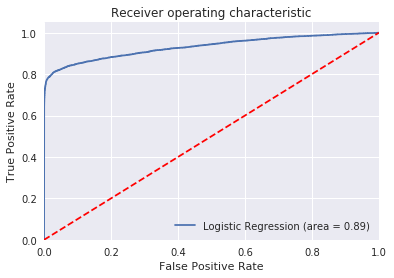

In [33]:
X_train,X_test,y_train,y_test=x_train4, x_val4, y_train4, y_val4
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Model RandomForestClassifier(n_estimators=130): accuracy is 0.9514053626626411


In [34]:
x_train6, x_val6, y_train6, y_val6 = train_test_split(features, targets,test_size = .1,random_state=12)

clf_rf = RandomForestClassifier(n_estimators=130, random_state=12)
clf_rf.fit(x_train6, y_train6)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=130, n_jobs=None,
            oob_score=False, random_state=12, verbose=0, warm_start=False)

In [35]:
#Predict
y_pred6=clf_rf.predict(x_val6)
print(classification_report(y_val6, y_pred6))
print(confusion_matrix(y_pred6,y_val6))
# Accuracy score
print('accuracy is',accuracy_score(y_pred6,y_val6))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     22320
           1       0.95      0.80      0.87      5502

   micro avg       0.95      0.95      0.95     27822
   macro avg       0.95      0.89      0.92     27822
weighted avg       0.95      0.95      0.95     27822

[[22086  1118]
 [  234  4384]]
accuracy is 0.9514053626626411


# GradientBoostingClassifier: accuracy is 0.9553590683631659

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
x_train5, x_val5, y_train5, y_val5 = train_test_split(features, targets,test_size = .1,random_state=12)

model5=GradientBoostingClassifier()
model5.fit(x_train5,y_train5) #(x_train_res,y_train_res)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [37]:
#Predict
y_pred5=model5.predict(x_val5)
print(classification_report(y_val5, y_pred5))
print(confusion_matrix(y_pred5,y_val5))
# Accuracy score
print('accuracy is',accuracy_score(y_pred5,y_val5))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     22320
           1       0.98      0.79      0.87      5502

   micro avg       0.96      0.96      0.96     27822
   macro avg       0.97      0.89      0.92     27822
weighted avg       0.96      0.96      0.95     27822

[[22238  1160]
 [   82  4342]]
accuracy is 0.9553590683631659


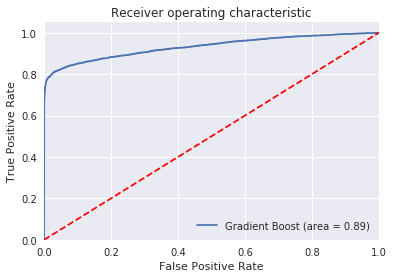

In [42]:
X_train,X_test,y_train,y_test=x_train5, x_val5, y_train5, y_val5
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gradient Boost (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# AdaBoostClassifier: accuracy is 0.9520523326863634


In [38]:
from sklearn.ensemble import AdaBoostClassifier
x_train9, x_val9, y_train9, y_val9 = train_test_split(features, targets,test_size = .1,random_state=12)

model9=AdaBoostClassifier()
model9.fit(x_train9,y_train9) #(x_train_res,y_train_res)
#Predict
y_pred9=model9.predict(x_val9)
print(classification_report(y_val9, y_pred9))
print(confusion_matrix(y_pred9,y_val9))
# Accuracy score
print('accuracy is',accuracy_score(y_pred9,y_val9))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     22320
           1       0.98      0.78      0.86      5502

   micro avg       0.95      0.95      0.95     27822
   macro avg       0.96      0.89      0.92     27822
weighted avg       0.95      0.95      0.95     27822

[[22220  1234]
 [  100  4268]]
accuracy is 0.9520523326863634


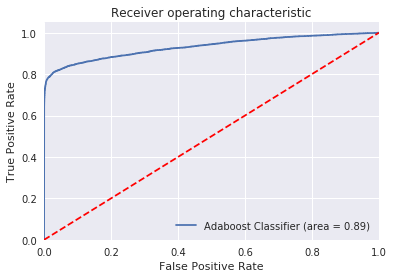

In [41]:
X_train,X_test,y_train,y_test=x_train9, x_val9, y_train9, y_val9
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Adaboost Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Models: SMOTE Random Forest and GradientBoosting
# 1)Gradient and Smote Accuracy is 0.9518007332
# 2)Random Forest and Smote Accuracy is 0.951585076

In [39]:
ones=y_train[y_train==1].count()
print(ones)
zeross=y_train[y_train==0].count()
print(zeross)

49940
200458


In [43]:
#smote only on the training features because of large class imbalance
X_train10, X_test10, y_train10, y_test10 = train_test_split(features, targets, test_size = 0.1, random_state = 42)
sm = SMOTE(k_neighbors=5, kind = 'regular', ratio='auto')#(random_state=12, ratio = 1.0)
x_train_res10, y_train_res10 = sm.fit_sample(X_train10, y_train10)

In [44]:
model6=GradientBoostingClassifier()
model6.fit(x_train_res10,y_train_res10) #(x_train_res,y_train_res)
#Predict
y_pred16=model6.predict(X_test10)
print(classification_report(y_test10, y_pred16))
print(confusion_matrix(y_pred16,y_test10))
# Accuracy score
print('accuracy is',accuracy_score(y_pred16,y_test10))
#vs. withoutsmote accuracy is 0.9553590683631659
#accuracy went down with smote

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     22389
           1       0.94      0.81      0.87      5433

   micro avg       0.95      0.95      0.95     27822
   macro avg       0.95      0.90      0.92     27822
weighted avg       0.95      0.95      0.95     27822

[[22093  1045]
 [  296  4388]]
accuracy is 0.9518007332326935


In [46]:
clf_rf2 = RandomForestClassifier(n_estimators=130, random_state=12)
clf_rf2.fit(x_train_res10,y_train_res10) #(x_train_res,y_train_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=130, n_jobs=None,
            oob_score=False, random_state=12, verbose=0, warm_start=False)

In [47]:
#Predict
y_pred17=clf_rf2.predict(X_test10)
print(classification_report(y_test10, y_pred17))
print(confusion_matrix(y_pred17,y_test10))
# Accuracy score
print('accuracy is',accuracy_score(y_pred17,y_test10))
#vs. accuracy is 0.9514053626626411 from above slightly better

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     22389
           1       0.93      0.81      0.87      5433

   micro avg       0.95      0.95      0.95     27822
   macro avg       0.94      0.90      0.92     27822
weighted avg       0.95      0.95      0.95     27822

[[22070  1028]
 [  319  4405]]
accuracy is 0.9515850765581195


# For loop to ID best n_estimators for RandomForest

In [ ]:
# training_features, test_features,training_target, test_target, = train_test_split(features, targets, test_size = 0.2, random_state = 42)
x_train, x_val, y_train, y_val = train_test_split(features, targets,
                                                  test_size = .2,
                                                  random_state=12)
model20 = RandomForestRegressor()# ** RUN
# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(80, 180, 10)
scores = []

for n in estimators:
    model20.set_params(n_estimators=n)
    model20.fit(x_train, y_train)
    scores.append(model20.score(x_val, y_val))

    print(scores)   
# [0.06876993650387908, 0.06814176310778741, 0.06812073297087695, 0.06546792401222368, 0.06745140662252946, 0.07017185833784179, 0.07237041038395498, 0.07026188479434115, 0.07065780446412384, 0.0713504146699957, 0.07152587497511753, 0.07142876040901402, 0.07000811412510188]
len(scores)
scores1 =pd.DataFrame(estimators,scores)
print(scores1)
# 0.067451  110
# 0.070172  120
# 0.072370  130
# 0.070262  140
# 0.070658  150
# 0.071350  160
# 0.071526  170
# 0.071429  180
# 0.070008  190

plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)
#best is 130

#  PCA: 130 of 284 features explain 95% of variance

In [87]:
from sklearn.decomposition import PCA
pca = PCA()#n_components=2)
pca.fit_transform(features,targets)
var_explained = pca.explained_variance_ratio_ #ratio of variance each PC explains

In [90]:
print(len(var_explained))
print(sum(var_explained[0:130]))
#120 is the number of features that explain 94% of the variance

284
0.9509387177122577


# KNeighbors Classifier: accuracy is 0.9568686650851844

In [17]:
from sklearn.neighbors import KNeighborsClassifier
X_trainC1, X_testC1, y_trainC1, y_testC1 = train_test_split(features, targets, test_size = 0.1, random_state = 42)
# sm = SMOTE(k_neighbors=5, kind = 'regular', ratio='auto')#(random_state=12, ratio = 1.0)
# x_train_resC1, y_train_resC1 = sm.fit_sample(X_trainC1, y_trainC1)

modeB1=KNeighborsClassifier(n_neighbors=5)
modeB1.fit(X_trainC1,y_trainC1) #(x_train_res,y_train_res) y_train_res10


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [19]:
#Predict
y_predB1=modeB1.predict(X_testC1)
print(classification_report(y_testC1, y_predB1))
print(confusion_matrix(y_predB1,y_testC1))
# Accuracy score
print('accuracy is',accuracy_score(y_predB1,y_testC1))
#vs. withoutsmote accuracy is 0.9553590683631659
#accuracy went down with smote

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     22389
           1       0.97      0.80      0.88      5433

   micro avg       0.96      0.96      0.96     27822
   macro avg       0.96      0.90      0.93     27822
weighted avg       0.96      0.96      0.96     27822

[[22262  1073]
 [  127  4360]]
accuracy is 0.9568686650851844


#  KNeighborsClassifier much worse results with Smote

In [16]:
from sklearn.neighbors import KNeighborsClassifier
X_trainC1, X_testC1, y_trainC1, y_testC1 = train_test_split(features, targets, test_size = 0.1, random_state = 42)
# sm = SMOTE(random_state=12, ratio = 1.0)#(random_state=12, ratio = 1.0)

In [17]:
# # SMOTE
from imblearn.over_sampling import SMOTE, ADASYN
print(y_testC1.value_counts()) #Previous original class distribution
x_train_resC1, y_train_resC1 = SMOTE(ratio="auto").fit_sample(X_trainC1, y_trainC1)
print(pd.Series(y_train_resC1).value_counts()) #Preview synthetic sample class distribution

0    22389
1     5433
Name: DepDelay, dtype: int64
1    200389
0    200389
dtype: int64


In [20]:
# x_train_resC1, y_train_resC1 = sm.fit_sample(X_trainC1, y_trainC1)

1    200389
0    200389
dtype: int64


In [21]:
modeB3=KNeighborsClassifier(n_neighbors=3)
modeB3.fit(x_train_resC1,y_train_resC1) #(x_train_res,y_train_res) y_train_res10

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [22]:
#Predict
y_predB3=modeB3.predict(X_testC1)

In [23]:
print(classification_report(y_testC1, y_predB3))
print(confusion_matrix(y_predB3,y_testC1))
# Accuracy score
print('accuracy is',accuracy_score(y_predB3,y_testC1))
#with smote much worse

              precision    recall  f1-score   support

           0       0.96      0.91      0.93     22389
           1       0.69      0.84      0.75      5433

   micro avg       0.89      0.89      0.89     27822
   macro avg       0.82      0.87      0.84     27822
weighted avg       0.91      0.89      0.90     27822

[[20332   891]
 [ 2057  4542]]
accuracy is 0.8940406872259363


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train1, x_val1, y_train1, y_val1 = train_test_split(features, targets,test_size = .1,random_state=12)
model00 = XGBClassifier()
model00.fit(x_train1, y_train1)

In [ ]:
y_pred00 = model.predict(x_val1)

accuracy = accuracy_score(y_val1, y_pred00)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
# creating odd list of K for KNN
myList = list(range(2,20))

# subsetting just the odd ones
neighbors = filter(lambda x: x % 2 != 0, myList)

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

In [ ]:
print(cv_scores)

# Model PCA and LogisticRegression: accuracy is 0.9469844008338725

In [24]:
X_traina1, X_testa1, y_traina1, y_testa1 = train_test_split(features, targets, test_size = 0.1, random_state = 42)
# pca = PCA(n_components = 150) #only include first 150 components
logistic = LogisticRegression(fit_intercept = False, C = 1e12) #Starter code
# forest_one = RandomForestClassifier(n_estimators=130, random_state=12)
pca = PCA()
pipeline = Pipeline(steps=[('pca', pca), ('logistic', logistic)])
fit = pipeline.fit(X_traina1, y_traina1)#fit model
prediction = pipeline.predict(X_testa1) #test model wit


/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [25]:
# print ('Validation Results')
print ('\nTest Results')
print (pipeline.score(X_testa1, y_testa1))
print (recall_score(y_testa1, prediction))


Test Results
0.9469844008338725
0.7936683232100129


In [26]:
# Summary of the predictions made by the classifier
print(classification_report(y_testa1, prediction))
print(confusion_matrix(y_testa1, prediction))
# Accuracy score
print('accuracy is',accuracy_score(prediction,y_testa1))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     22389
           1       0.92      0.79      0.85      5433

   micro avg       0.95      0.95      0.95     27822
   macro avg       0.94      0.89      0.91     27822
weighted avg       0.95      0.95      0.95     27822

[[22035   354]
 [ 1121  4312]]
accuracy is 0.9469844008338725


In [28]:
pca=PCA()
pca.fit_transform(features,targets)
explained_variance=pca.explained_variance_ratio_
print(sum(explained_variance[0:130]))

0.9998863028175851


In [36]:
print(sum(explained_variance[0:4]))
len(explained_variance)

0.997592663957758


290

In [41]:
principalComponents = pca.fit_transform(features)
# principalDf = pd.DataFrame(data = principalComponents
#              , columns = ['principal component 1', 'principal component 2'])
principalComponents

array([[-5.40541690e+00, -3.38358107e+00, -1.56231317e+00, ...,
        -3.64210832e-14,  2.11276686e-14, -4.82693325e-15],
       [-5.40589939e+00, -3.38445376e+00, -1.56336621e+00, ...,
        -1.84826991e-14,  4.52731208e-14, -7.09204758e-15],
       [-5.40595050e+00, -3.38445297e+00, -1.56317997e+00, ...,
         1.61444128e-14,  9.58350530e-14, -1.49239094e-14],
       ...,
       [-5.40558891e+00, -3.38279082e+00, -1.56401392e+00, ...,
        -3.01592655e-16,  1.23844211e-16, -9.66407792e-18],
       [-5.40563309e+00, -3.38284318e+00, -1.56400275e+00, ...,
         4.26858550e-16, -4.06125106e-17, -3.67741380e-18],
       [-5.40566250e+00, -3.38287678e+00, -1.56405390e+00, ...,
        -4.46893746e-16,  8.72631819e-17,  4.75404592e-19]])

In [44]:
# PCA
pca = PCA(n_components=4)
pca.fit_transform(features)

# Dump components relations with features:
print (pd.DataFrame(pca.components_,columns=features.columns,index = ['PC-1','PC-2','PC-3','PC-4']))

          hour  pressure  humidity  temperature  wind_speed  Distance  \
PC-1  0.000461  0.000048  0.000119     0.000037    0.000156 -0.000034   
PC-2  0.001055  0.000097  0.000156    -0.000077    0.000340 -0.000088   
PC-3 -0.000217  0.000024  0.000873    -0.000413    0.000452  0.000100   
PC-4  0.000258 -0.000044  0.000298    -0.000151    0.000025  0.000418   

      CarrierDelay  WeatherDelay  NASDelay  SecurityDelay  LateAircraftDelay  \
PC-1      0.981502      0.003635  0.041016       0.000058           0.186967   
PC-2     -0.189040      0.076716  0.063812       0.000155           0.976884   
PC-3     -0.001204      0.914252  0.393175       0.000002          -0.097717   
PC-4     -0.030253     -0.397795  0.916322       0.000236          -0.034476   

      CancellationCode  Origin_ATL  Origin_CLT  Origin_DEN  Origin_DFW  \
PC-1     -3.615568e-35   -0.000242   -0.000246   -0.000029    0.000109   
PC-2     -2.080583e-35   -0.000874   -0.000388    0.000461   -0.000024   
PC-3     -7

# Save model info

In [56]:
### save the model to disk
# filename = 'flightpcaandrandomforest120_model.sav'
# pickle.dump(clf_rf, open(filename, 'wb'))
 
# # load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(x_val, y_val)
# print(result)
# y_train_res

In [ ]:
importances = y_predB3.feature_importances_
importances

# scoring

In [ ]:
# from sklearn.metrics import precision_score
# from sklearn.metrics import precision_recall_fscore_support
# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import recall_score

# y_true,y_pred=y_test10,y_predB1

# roc_auc_score(y_true, y_pred)
# precision_score(y_true, y_pred, average='macro')  
# precision_score(y_true, y_pred, average='micro')  
# precision_score(y_true, y_pred, average='weighted')
# precision_score(y_true, y_pred, average=None)

# precision_recall_fscore_support(y_true, y_pred, average='macro')
# precision_recall_fscore_support(y_true, y_pred, average='micro')
# precision_recall_fscore_support(y_true, y_pred, average='weighted')


# recall_score(y_true, y_pred, average='macro')  
# recall_score(y_true, y_pred, average='micro')  
# recall_score(y_true, y_pred, average='weighted')  
# recall_score(y_true, y_pred, average=None)

# precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
#     precision  
#     recall
#     thresholds

In [77]:
# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import roc_curve
# # X_train,X_test,y_train,y_test=x_train4, x_val4, y_train4, y_val4
# X_train,X_test,y_train,y_test=x_train5, x_val5, y_train5, y_val5
# logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
# fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
# plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic')
# plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
# plt.show()

In [ ]:
# # SMOTE
# from imblearn.over_sampling import SMOTE, ADASYN
# print(y_train.value_counts()) #Previous original class distribution
# x_resampled, y_resampled = SMOTE(ratio="auto").fit_sample(X_train,y_train)
# print(pd.Series(y_resampled).value_counts()) #Preview synthetic sample class distribution